In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.pipeline import Pipeline

### Область работы 2 (выполнение лучшей модели)

In [4]:
# Данный блок(и) в области 2 выполняется преподавателем
#
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения

In [5]:
# Путь к тренировочному набору
path_train = 'train_house_B.csv' # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test  = 'test_house_B.csv' # содержит только имя файла, без имен папок

In [6]:
# Блок(и) обучения и поверки модели

In [7]:
df_train = pd.read_csv(path_train)
df_train = df_train.drop_duplicates()
df_train.drop(['3', '10', '17', '19', '28'], axis=1)

,price,0,1,2,4,5,6,7,8,9,...,16,18,20,21,22,23,24,25,26,27
0,2604000,1.222962,0.047686,-1.033389,0.831065,0.802990,1.590989,0.727946,0.893957,-1.503143,...,-0.465315,-0.263991,-0.554035,-1.308863,-0.570187,-0.882735,-0.805741,-0.929397,0.232557,-0.679063
1,4900000,-0.091662,-0.356325,-0.486840,-0.126718,-0.024866,-0.323972,1.658337,1.751428,-1.573310,...,2.149083,-0.263991,-0.554035,0.047278,-0.570187,-0.897850,-0.805741,0.224410,0.864016,1.472618
2,4480000,1.222962,-1.064819,0.338749,-0.854973,-0.654330,0.525426,0.585866,-1.661101,1.007304,...,-0.465315,-0.263991,-0.554035,-1.308863,-0.570187,-0.491114,0.355976,-0.929397,1.118967,1.472618
3,3234000,1.222962,-1.570692,-0.696696,-0.670784,-0.024866,0.557116,-1.280083,1.273040,-1.163932,...,-0.465315,-0.263991,-0.554035,1.403419,-0.570187,-0.724485,-0.805741,0.224410,0.924687,-0.679063
4,3780000,-1.406286,-1.563680,-1.058295,-0.126718,-0.879174,-1.649281,0.496669,0.255596,0.928381,...,-0.465315,-0.263991,1.804941,0.047278,-0.570187,-0.306965,-0.805741,1.378217,0.170486,-0.679063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,3360000,-0.091662,0.593876,-0.087882,0.077307,0.151482,1.452151,1.772175,-1.264971,-1.352937,...,-0.465315,-0.263991,-0.554035,1.403419,-0.570187,0.454355,-0.805741,1.378217,1.200306,-0.679063
404,5950000,-1.406286,0.179794,0.640850,-0.126718,-0.975186,-1.028510,0.203867,-1.190658,0.955389,...,2.149083,-0.263991,1.804941,0.047278,-0.570187,-1.037904,1.517692,-0.929397,0.960546,-0.679063
405,3675000,-0.091662,1.099966,0.225750,-0.716123,-0.534316,-0.090348,1.151380,1.631097,0.673274,...,-0.465315,-0.263991,-0.554035,-1.308863,-0.570187,0.477182,-0.805741,-0.929397,-1.512245,-0.679063
406,7455000,1.222962,1.498909,-0.392289,-0.126718,-0.024866,1.484438,-1.233671,-0.469048,-1.250468,...,-0.465315,-0.263991,-0.554035,0.047278,1.421812,0.407275,0.355976,0.224410,-1.477806,-0.679063


In [8]:
df_test = pd.read_csv(path_test)
df_test = df_test.drop_duplicates()
df_test.drop(['3', '10', '17', '19', '28'], axis=1)

,0,1,2,4,5,6,7,8,9,11,...,16,18,20,21,22,23,24,25,26,27
0,-0.091662,-0.499563,0.161178,-0.126718,-0.024866,1.008138,-0.266271,-0.096935,0.167552,-1.397012,...,-0.465315,-0.263991,-0.554035,0.047278,1.421812,0.799192,0.355976,0.224410,1.536388,-0.679063
1,-0.091662,0.077002,0.419463,-0.954152,-0.740055,-0.396757,-0.584346,0.759100,-0.581775,-0.091529,...,-0.465315,-0.263991,-0.554035,-1.308863,-0.570187,0.251399,0.355976,-0.929397,1.678171,-0.679063
2,-1.406286,1.505583,0.853013,-0.126718,2.326442,1.390701,1.495469,-1.667171,-1.525251,1.378647,...,-0.465315,-0.263991,-0.554035,0.047278,1.421812,0.463905,1.517692,2.532024,1.340759,1.472618
3,1.222962,1.387026,0.668524,1.006754,-0.024866,0.732728,-0.053591,-1.773094,0.276236,0.667388,...,2.149083,1.791369,1.804941,1.403419,1.421812,0.241826,0.355976,0.224410,0.644806,1.472618
4,-0.091662,-1.159181,0.391790,0.666712,1.346730,0.048737,-1.351088,0.638630,0.483270,-0.168555,...,-0.465315,1.791369,-0.554035,1.403419,1.421812,-0.440720,0.355976,2.532024,-0.730109,1.472618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,-0.091662,0.231875,0.410239,-0.126718,-0.730258,0.072631,-1.182195,-0.838603,-1.317578,1.130018,...,-0.465315,-0.263991,1.804941,0.047278,-0.570187,0.255979,1.517692,-0.929397,-1.611764,-0.679063
133,1.222962,1.621773,1.337297,-2.081956,-1.714868,-0.182562,0.027905,-0.794618,-0.901463,1.320765,...,-0.465315,-0.263991,-0.554035,-1.308863,-0.570187,2.185263,-0.805741,-0.929397,0.238251,-0.679063
134,-0.091662,0.566685,0.640850,0.972749,-0.024866,0.995279,-0.004207,-0.946793,0.403477,-1.202292,...,-0.465315,1.791369,-0.554035,1.403419,1.421812,-0.500889,-0.805741,0.224410,-0.862375,1.472618
135,-0.091662,1.319723,-0.908859,0.678047,0.670729,-0.059496,0.483345,-0.914062,-0.412654,1.219795,...,-0.465315,-2.319351,-0.554035,-1.308863,1.421812,-0.446280,1.517692,-0.929397,-0.516819,-0.679063


In [9]:
# имена фич
print(df_test.columns)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28'],
      dtype='object')


In [10]:
y = df_train['price']
X = df_train.drop('price', axis=1)

ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=10.0, max_iter=5000, solver='saga'))
])
ridge_pipeline.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=10.0, max_iter=5000, solver='saga'))])

In [11]:
# Блок предсказания с использованием тестового набора

In [12]:
y_pred = ridge_pipeline.predict(df_test)
print(y_pred)

[5295215.72984649 4045811.31858447 7723292.71444085 7447372.50823591
 7161972.68868321 3829836.91704912 4021365.1065356  4010086.95414373
 3120031.63452867 4472135.74832585 5414579.70113168 4404433.3881288
 3743887.72085188 5449642.94896493 6344286.62756241 6439567.40991274
 3290693.28684204 2376648.89472543 7434659.51005265 4150573.1470631
 3544291.25512592 4567998.18317703 4629059.07211008 2495262.1896898
 3552580.68706514 2769712.2606713  7411629.35936535 2968713.92882613
 5955508.62124071 5927320.01352901 3745970.4071151  3963886.85300613
 6831086.71783233 2674058.80895223 2927534.35231596 5513329.56612912
 3457187.07553947 4273417.63434036 3791104.15197953 6734332.49972708
 5650781.98597678 8743170.17462505 3429788.2512076  5595172.62583487
 3316424.20972434 5912296.38070122 8873703.90710438 3675363.61661336
 5770311.3139179  4102721.00043018 5357153.14079012 5639195.82574551
 3276553.65372817 6903208.71910938 4529522.12892478 5714346.25663195
 3023661.75341805 2806897.67969294 27

In [13]:
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict = y_pred

(137,) (137,)
Отрицательные цены -  0
Max Error: 4,524,692
 
----------------------
   MAPE Error: 18.19
----------------------


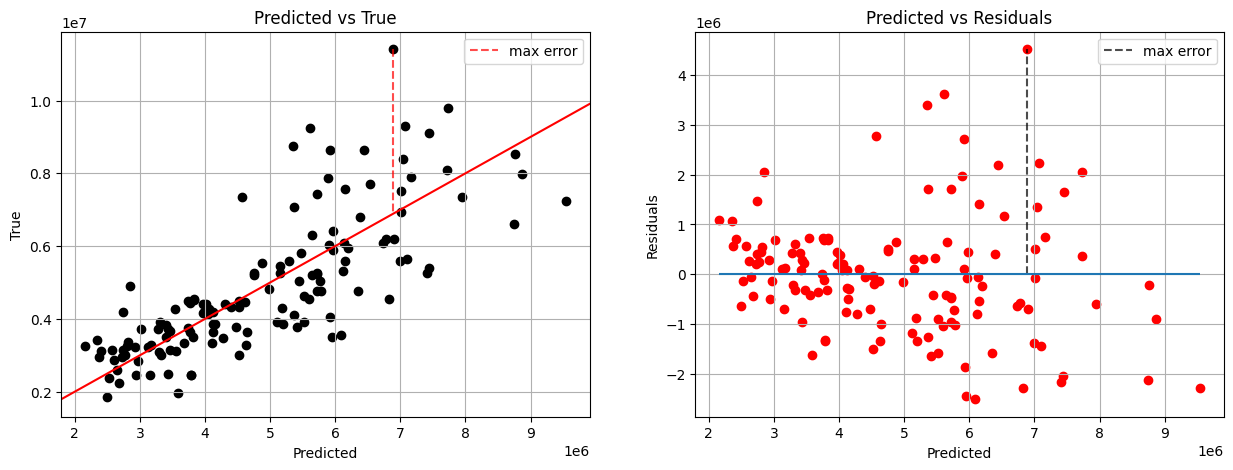

In [14]:
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

y_true = pd.read_csv("test_Y_true_house_B.csv").values.reshape(-1)
print(y_predict.shape, y_true.shape)
print('Отрицательные цены - ', sum(y_predict<0))

def plot_2_error(y_true, y_predicted):
    residuals = y_true - y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predict)
    print("Max Error:", "{:,.0f}".format(max_error))
    print(' ')
    print('----------------------')
    print("   MAPE Error:", "{:,.2f}".format(mape*100))
    print('----------------------')

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_predicted, y_true, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red")
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()

plot_2_error(y_true, y_predict)

In [15]:
mask = df_test.columns

import pickle
with open('saved_dictionary_b.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

color_dict = pd.Series(loaded_dict).to_frame().reset_index().sort_values(by=0).reset_index(drop=True)
color = (color_dict['index'].isin(mask)).map({True: 'background-color: yellow', False: ''})
color_dict.style.apply(lambda s: color)

,index,0
0,10,1
1,27,airconditioning
2,2,area
3,12,area bathrooms
4,4,area bedrooms
5,5,area stories
6,15,basement
7,22,bathrooms
8,19,bathrooms stories
9,21,bedrooms
